In [ ]:
import pandas as pd
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math
import numpy as np
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Covid Community Profile Report, Filtering NY only results

In [ ]:
covid_by_county_us_url = 'https://raw.githubusercontent.com/mluevanos/ds4a_88_project/main/Community_Profile_Report_20210527_County.csv'
covid_by_county_us_df = pd.read_csv(covid_by_county_us_url)
covid_by_county_us_df.columns = covid_by_county_us_df.iloc[0]
covid_by_county_us_df = covid_by_county_us_df.drop(covid_by_county_us_df.index[0])
covid_by_county_ny_df = covid_by_county_us_df[covid_by_county_us_df["State Abbreviation"] == "NY"]
#cols_to_drop = ["County with State", "FIPS code", "County type", "CBSA", "CBSA type", "FEMA region", "Population as a percent of CBSA", "Population as a percent of national population", "IHE with >5000 full-time enrollment", "IHE Full-time enrollment", "IHE Full-time enrollment as a percent of the population", "Cases as a percent of national total - last 7 days", "Cases - last 7 days", "Cases per 100k - last 7 days", "Deaths - last 7 days", "Deaths per 100k - last 7 days", "Cases - % change", "Deaths - % change", "Cases as a percent of national total - previous 7 days", "Cases - previous 7 days", "Cases per 100k - previous 7 days", "Deaths - previous 7 days", "Deaths per 100k - previous 7 days", "Rapid rise (last 14 days)", "Number of days of downward case trajectory", "Area of Concern Category", "Rapid Riser Category", "Community Transmission Level - last 7 days", "Community Transmission Level - previous 7 days", "Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting)", "Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting)", "RT-PCR tests per 100k - last 7 days (may be an underestimate due to delayed reporting)", "Median test latency - last 7 days", "% tests resulted in 3 or fewer days - last 7 days", "Viral (RT-PCR) lab test positivity rate - absolute change (may be an underestimate due to delayed reporting)", "Total RT-PCR diagnostic tests - % change (may be an underestimate due to delayed reporting)", "Testing latency - absolute change", "% tests resulted in 3 or fewer days - absolute change", "Viral (RT-PCR) lab test positivity rate - previous 7 days (may be an underestimate due to delayed reporting)", "Total RT-PCR diagnostic tests - previous 7 days (may be an underestimate due to delayed reporting)", "RT-PCR tests per 100k - previous 7 days(may be an underestimate due to delayed reporting)", "Median test latency - last 7 days", "% tests resulted in 3 or fewer days - last 7 days", "Confirmed COVID-19 admissions - last 7 days", "Confirmed COVID-19 admissions per 100 inpatient beds - last 7 days", "Suspected COVID-19 admissions - last 7 days", "Suspected COVID-19 admissions per 100 inpatient beds - last 7 days", "% inpatient beds occupied", "% inpatient beds occupied by COVID-19 patient", "% hospital CCNs reporting any utilization data at least once - last 7 days", "% hospital CCNs reporting all utilization data at least once - last 7 days", "% hospital CCNs ever reporting utilization data", "% hospital CCNs reporting COVID-19 admissions at least once - last 7 days", "People with at least 1 dose", "People with at least 1 dose as % of total population", "People who are fully vaccinated", "People who are fully vaccinated as % of total population", "People initiating vaccination - last 7 days - ages 12-17", "People initiating vaccination as % of population - last 7 days - ages 12-17", "People initiating vaccination - last 7 days - ages 18+", "People initiating vaccination as % of population - last 7 days - ages 18+", "People initiating vaccination - last 7 days - ages 65+", "People initiating vaccination as % of population - last 7 days - ages 65+", "People initiating vaccination as % of population - absolute change - ages 12-17", "People initiating vaccination as % of population - absolute change - ages 18+", "People initiating vaccination as % of population - absolute change - ages 65+", "People with at least 1 dose - ages 12-17", "People with at least 1 dose as % of population - 12-17", "People who are fully vaccinated - 12-17", "People who are fully vaccinated as % of population - 12-17", "People with at least 1 dose - ages 18+", "People with at least 1 dose as % of population - ages 18+", "People who are fully vaccinated - ages 18+", "People who are fully vaccinated as % of population - ages 18+", "People with at least 1 dose - ages 65+", "People with at least 1 dose as % of population - ages 65+", "People who are fully vaccinated - ages 65+", "People who are fully vaccinated as % of population - ages 65+", "SVI score", "CCVI score", "Forecasted case trajectory"]
#covid_by_county_ny_df = covid_by_county_ny_df.drop(cols_to_drop, axis = 1)
covid_by_county_ny_df.head()
#county = covid_by_county_ny_df["County"]
#county.head()

,County with State,County,FIPS code,County type,CBSA,CBSA type,State Abbreviation,FEMA region,Population,Population as a percent of CBSA,Population as a percent of state,Population as a percent of national population,IHE with >5000 full-time enrollment,IHE Full-time enrollment,IHE Full-time enrollment as a percent of the population,Cases as a percent of national total - last 7 days,Cases - last 7 days,Cases per 100k - last 7 days,Deaths - last 7 days,Deaths per 100k - last 7 days,Cases - % change,Deaths - % change,Cases as a percent of national total - previous 7 days,Cases - previous 7 days,Cases per 100k - previous 7 days,Deaths - previous 7 days,Deaths per 100k - previous 7 days,Cumulative cases,Cumulative cases per 100k,Cumulative deaths,Cumulative deaths per 100k,Rapid rise (last 14 days),Number of days of downward case trajectory,Area of Concern Category,Rapid Riser Category,Community Transmission Level - last 7 days,Community Transmission Level - previous 7 days,Viral (RT-PCR) lab test positivity rate - last 7 days (may be an underestimate due to delayed reporting),Total RT-PCR diagnostic tests - last 7 days (may be an underestimate due to delayed reporting),RT-PCR tests per 100k - last 7 days (may be an underestimate due to delayed reporting),...,% hospital CCNs reporting any utilization data at least once - last 7 days,% hospital CCNs reporting all utilization data at least once - last 7 days,% hospital CCNs ever reporting utilization data,% hospital CCNs reporting COVID-19 admissions at least once - last 7 days,People with at least 1 dose,People with at least 1 dose as % of total population,People who are fully vaccinated,People who are fully vaccinated as % of total population,People initiating vaccination - last 7 days - ages 12-17,People initiating vaccination as % of population - last 7 days - ages 12-17,People initiating vaccination - last 7 days - ages 18+,People initiating vaccination as % of population - last 7 days - ages 18+,People initiating vaccination - last 7 days - ages 65+,People initiating vaccination as % of population - last 7 days - ages 65+,People initiating vaccination as % of population - absolute change - ages 12-17,People initiating vaccination as % of population - absolute change - ages 18+,People initiating vaccination as % of population - absolute change - ages 65+,People with at least 1 dose - ages 12-17,People with at least 1 dose as % of population - 12-17,People who are fully vaccinated - 12-17,People who are fully vaccinated as % of population - 12-17,People with at least 1 dose - ages 18+,People with at least 1 dose as % of population - ages 18+,People who are fully vaccinated - ages 18+,People who are fully vaccinated as % of population - ages 18+,People with at least 1 dose - ages 65+,People with at least 1 dose as % of population - ages 65+,People who are fully vaccinated - ages 65+,People who are fully vaccinated as % of population - ages 65+,% Uninsured,% In Poverty,% Over Age 65,Average household size,% Non-Hispanic Black,% Hispanic,% Non-Hispanic Native American / Alaskan Native,% Non-Hispanic Asian,SVI score,CCVI score,Forecasted case trajectory
15,"Kings County, NY",Kings County,36047,Large central metro,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan,NY,2,"2,559,903",13.3%,13.2%,0.8%,-,"15,416",0.6%,0.7%,"1,134",44,43,1.7,-25%,-22%,0.7%,"1,509",59,55,2.1,"279,152","10,905","10,383",406,-,49,ModerateBurdenResolving,NaN,Moderate,Substantial,1.1%,"114,918","4,489",...,100%,92%,100%,100%,"1,157,313",45.2%,"936,177",36.6%,"5,658",3.3%,"29,505",1.5%,"3,407",0.9%,NaN,NaN,NaN,"28,284",16.3%,"9,001",5.2%,"1,128,883",57.0%,"927,127",46.8%,"241,358",65.6%,"205,837",56.0%,8%,21%,14%,2.7,30%,19%,0%,12%,0.82,0.91,Uncertain
21,"Queens County, NY",Queens County,36081,Large central metro,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan,NY,2,"2,253,858",11.7%,11.6%,0.7%,2,"29,190",1.3%,0.5%,876,39,29,1.3,-43%,-38%,0.7%,"1,545",69,47,2.1,"275,904","12,241","9,898",439,-,48,ModerateBu

In [ ]:
covid_by_county_us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3272
Columns: 113 entries, County with State to Forecasted case trajectory
dtypes: object(113)
memory usage: 2.8+ MB


##Taking only the columns that are interesting

In [ ]:
covid_by_ny_county = covid_by_county_ny_df[["County ", "State Abbreviation", "Population", "Population as a percent of state", "Cumulative cases", "Cumulative cases per 100k", "Cumulative deaths", "Cumulative deaths per 100k", "% Uninsured", "% In Poverty", "% Over Age 65", "Average household size", "% Non-Hispanic Black", "% Hispanic", "% Non-Hispanic Native American / Alaskan Native", "% Non-Hispanic Asian"]]

covid_by_ny_county.head()

,County,State Abbreviation,Population,Population as a percent of state,Cumulative cases,Cumulative cases per 100k,Cumulative deaths,Cumulative deaths per 100k,% Uninsured,% In Poverty,% Over Age 65,Average household size,% Non-Hispanic Black,% Hispanic,% Non-Hispanic Native American / Alaskan Native,% Non-Hispanic Asian
15,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%
21,Queens County,NY,"2,253,858",11.6%,"275,904","12,241","9,898",439,11%,13%,16%,2.9,18%,28%,0%,26%
22,Monroe County,NY,"741,770",3.8%,"68,059","9,175","1,093",147,4%,15%,18%,2.4,15%,9%,0%,4%
42,Bronx County,NY,"1,418,207",7.3%,"182,260","12,851","6,560",463,10%,29%,13%,2.8,29%,56%,0%,4%
55,Suffolk County,NY,"1,476,601",7.6%,"200,205","13,559","3,390",230,5%,7%,17%,3.0,7%,20%,0%,4%


In [ ]:
covid_by_ny_county["County"] = covid_by_ny_county["County "].str.strip()
covid_by_ny_county["County"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['Kings County', 'Queens County', 'Monroe County', 'Bronx County',
       'Suffolk County', 'Erie County', 'Nassau County',
       'New York County', 'Onondaga County', 'Westchester County',
       'Richmond County', 'Niagara County', 'Orange County',
       'Albany County', 'Broome County', 'Oneida County',
       'Saratoga County', 'Dutchess County', 'Rockland County',
       'Schenectady County', 'Oswego County', 'Chemung County',
       'Chautauqua County', 'Jefferson County', 'Steuben County',
       'Livingston County', 'St. Lawrence County', 'Allegany County',
       'Cortland County', 'Ulster County', 'Wayne County',
       'Sullivan County', 'Cayuga County', 'Tioga County',
       'Rensselaer County', 'Ontario County', 'Wyoming County',
       'Genesee County', 'Cattaraugus County', 'Lewis County',
       'Madison County', 'Otsego County', 'Herkimer County',
       'Tompkins County', 'Orleans County', 'Warren County',
       'Fulton County', 'Montgomery County', 'Chenang

##Importing Food Access info, filtering only for NY

In [ ]:
food_access_by_tract_url = "https://raw.githubusercontent.com/mluevanos/ds4a_88_project/main/FoodAccessResearchAtlasData2019.csv"
food_access_us_df = pd.read_csv(food_access_by_tract_url)
food_access_ny_df = food_access_us_df[food_access_us_df["State"] == "New York"]
food_access_ny_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,...,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
42869,36001000100,New York,Albany County,1,2139,784,0,79.0,3.69,1,1,1,1,1,1,32.5,45515.0,1,1,1,1,1,0,0,1,2139.0,2139.0,2139.0,1246.0,1246.0,1246.0,2139.0,100.00,1246.0,58.26,644.0,30.11,218.0,10.19,506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183.0,644.0,218.0,506.0,1396.0,55.0,0.0,9.0,173.0,198.0,179.0,276.0
42870,36001000200,New York,Albany County,1,6046,2514,0,84.0,1.39,1,1,1,1,1,1,34.4,39545.0,1,1,1,1,1,0,0,1,2981.0,5948.0,2981.0,2042.0,3389.0,2042.0,5948.0,98.38,3389.0,56.05,1917.0,31.71,398.0,6.58,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501.0,1946.0,401.0,840.0,4647.0,57.0,0.0,12.0,490.0,648.0,895.0,960.0
42871,36001000300,New York,Albany County,1,5888,2581,0,193.0,3.28,1,1,1,1,1,1,27.0,45384.0,1,1,1,1,1,0,0,1,1151.0,2847.0,1151.0,189.0,1013.0,189.0,2847.0,48.36,1013.0,17.20,496.0,8.42,583.0,9.89,1731.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3006.0,1297.0,859.0,2941.0,2199.0,213.0,1.0,19.0,515.0,615.0,708.0,554.0
42872,36001000401,New York,Albany County,1,2227,1017,0,575.0,25.82,0,0,0,0,1,0,7.7,99514.0,1,1,1,1,1,0,0,1,505.0,1522.0,505.0,111.0,334.0,111.0,1522.0,68.35,334.0,15.00,111.0,5.00,556.0,24.94,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.0,149.0,1088.0,1921.0,205.0,56.0,0.0,2.0,43.0,53.0,139.0,5.0
42873,36001000403,New York,Albany County,1,4415,2196,0,15.0,0.34,0,0,0,0,1,0,12.3,115391.0,0,1,0,1,0,0,0,1,371.0,1429.0,371.0,87.0,259.0,87.0,1429.0,32.36,259.0,5.86,175.0,3.96,233.0,5.27,1180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865.0,531.0,679.0,3386.0,427.0,443.0,1.0,5.0,153.0,201.0,437.0,286.0


In [ ]:
food_access_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


##Taking Only the Columns we are Interested In

In [ ]:
food_access_ny_by_county = food_access_ny_df[["CensusTract", "State", "County", "LILATracts_1And10", "HUNVFlag", "MedianFamilyIncome", "LA1and10", "lapop1", "lalowi1", "lakids1", "laseniors1", "lawhite1", "lablack1", "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1", "lahunv1", "lasnap1", "lapop10", "lalowi10", "lakids10", "laseniors10", "lawhite10", "lablack10", "laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10", "lahunv10", "lasnap10", "TractLOWI", "TractKids", "TractSeniors", "TractWhite", "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", "TractOMultir", "TractHispanic", "TractHUNV", "TractSNAP"]]
food_access_ny_by_county.head()
#food_access_ny_by_county["County"].unique() There are about 50 different counties

,CensusTract,State,County,LILATracts_1And10,HUNVFlag,MedianFamilyIncome,LA1and10,lapop1,lalowi1,lakids1,laseniors1,lawhite1,lablack1,laasian1,lanhopi1,laaian1,laomultir1,lahisp1,lahunv1,lasnap1,lapop10,lalowi10,lakids10,laseniors10,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10,lahunv10,lasnap10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
42869,36001000100,New York,Albany County,1,1,45515.0,1,2139.0,1246.0,644.0,218.0,506.0,1396.0,55.0,0.0,9.0,173.0,198.0,172.0,259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183.0,644.0,218.0,506.0,1396.0,55.0,0.0,9.0,173.0,198.0,179.0,276.0
42870,36001000200,New York,Albany County,1,1,39545.0,1,2981.0,2042.0,1068.0,195.0,394.0,2298.0,21.0,0.0,3.0,264.0,372.0,612.0,556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501.0,1946.0,401.0,840.0,4647.0,57.0,0.0,12.0,490.0,648.0,895.0,960.0
42871,36001000300,New York,Albany County,1,1,45384.0,1,1151.0,189.0,103.0,325.0,886.0,152.0,80.0,0.0,1.0,32.0,50.0,70.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3006.0,1297.0,859.0,2941.0,2199.0,213.0,1.0,19.0,515.0,615.0,708.0,554.0
42872,36001000401,New York,Albany County,0,1,99514.0,1,505.0,111.0,37.0,153.0,433.0,46.0,15.0,0.0,1.0,10.0,13.0,36.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,445.0,149.0,1088.0,1921.0,205.0,56.0,0.0,2.0,43.0,53.0,139.0,5.0
42873,36001000403,New York,Albany County,0,1,115391.0,0,371.0,87.0,49.0,58.0,328.0,12.0,16.0,0.0,0.0,15.0,24.0,44.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,865.0,531.0,679.0,3386.0,427.0,443.0,1.0,5.0,153.0,201.0,437.0,286.0


In [ ]:
food_access_ny_by_county[food_access_ny_by_county["County"] == "Kings County"]["lapop1"].mean()

30.307692307692307

In [ ]:
#for county in food_access_ny_by_county["County"]:
  #avg_med_income = food_access_ny_by_county["MedianFamilyIncome"].mean()
#print(avg_med_income)
  #food_access_ny_by_county["Average Income"] = food_access_ny_by_county["MedianFamilyIncome"].mean()

##Merging DataFrames on County

In [ ]:
merged_on_county_df = pd.merge(covid_by_ny_county, food_access_ny_by_county, on="County")
merged_on_county_df.head(10)

,County,State Abbreviation,Population,Population as a percent of state,Cumulative cases,Cumulative cases per 100k,Cumulative deaths,Cumulative deaths per 100k,% Uninsured,% In Poverty,% Over Age 65,Average household size,% Non-Hispanic Black,% Hispanic,% Non-Hispanic Native American / Alaskan Native,% Non-Hispanic Asian,County,CensusTract,State,LILATracts_1And10,HUNVFlag,MedianFamilyIncome,LA1and10,lapop1,lalowi1,lakids1,laseniors1,lawhite1,lablack1,laasian1,lanhopi1,laaian1,laomultir1,lahisp1,lahunv1,lasnap1,lapop10,lalowi10,lakids10,laseniors10,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10,lahunv10,lasnap10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000100,New York,0,0,141964.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,837.0,522.0,843.0,3396.0,427.0,330.0,0.0,15.0,170.0,347.0,1417.0,126.0
1,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000200,New York,0,0,41250.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,695.0,455.0,70.0,530.0,103.0,49.0,0.0,16.0,772.0,1277.0,265.0,138.0
2,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000301,New York,0,0,243043.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659.0,619.0,688.0,3658.0,180.0,241.0,0.0,6.0,174.0,246.0,1220.0,24.0
3,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000501,New York,0,0,229125.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0,395.0,553.0,3266.0,292.0,432.0,1.0,22.0,234.0,312.0,1261.0,162.0
4,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000502,New York,0,0,194159.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,254.0,357.0,2086.0,113.0,186.0,0.0,4.0,123.0,162.0,1165.0,31.0
5,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000700,New York,0,0,209694.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,533.0,327.0,2885.0,109.0,198.0,5.0,2.0,160.0,283.0,1051.0,43.0
6,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047000900,New York,0,0,250001.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,469.0,281.0,3018.0,204.0,639.0,2.0,5.0,304.0,325.0,1554.0,31.0
7,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047001100,New York,0,0,174083.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,11.0,7.0,36.0,19.0,10.0,0.0,0.0,19.0,28.0,622.0,3.0
8,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047001300,New York,0,0,166250.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779.0,155.0,300.0,1531.0,357.0,249.0,0.0,4.0,134.0,311.0,480.0,0.0
9,Kings County,NY,"2,559,903",13.2%,"279,152","10,905","10,383",406,8%,21%,14%,2.7,30%,19%,0%,12%,Kings County,36047001500,New York,0,0,94336.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2606.0,604.0,210.0,1350.0,1320.0,406.0,2.0,25.0,418.0,811.0,2875.0,608.0


In [ ]:
merged_on_county_df['Cumulative cases per 100k'] = merged_on_county_df['Cumulative cases per 100k'].str.strip()
merged_on_county_df['Cumulative cases per 100k'] = merged_on_county_df['Cumulative cases per 100k'].str.replace(",","")
merged_on_county_df['Cumulative cases per 100k'] = merged_on_county_df['Cumulative cases per 100k'].astype(float)

In [ ]:
merged_on_county_df["Cumulative_cases_per100k"] = merged_on_county_df['Cumulative cases per 100k']
#merged_on_county_df.rename(columns={"Cumulative cases per 100k": "Cumulative_cases_per100k"})

In [ ]:
merged_on_county_df['% Non-Hispanic Native American / Alaskan Native']

0       0%
1       0%
2       0%
3       0%
4       0%
        ..
4865    0%
4866    0%
4867    0%
4868    0%
4869    0%
Name: % Non-Hispanic Native American / Alaskan Native, Length: 4870, dtype: object

##Normalizing some data from the merged_on_county_df, turning percentages into floats, removing the % sign, and making a decimal

In [ ]:
merged_on_county_df["p_Uninsured"] = merged_on_county_df['% Uninsured'].str.replace("%", "")
merged_on_county_df["p_Uninsured"] = merged_on_county_df['p_Uninsured'].astype(float)
merged_on_county_df["p_Uninsured"] = merged_on_county_df['p_Uninsured'] / 100
merged_on_county_df["p_Poverty"] = merged_on_county_df['% In Poverty'].str.replace("%", "")
merged_on_county_df["p_Poverty"] = merged_on_county_df['p_Poverty'].astype(float)
merged_on_county_df["p_Poverty"] = merged_on_county_df['p_Poverty'] / 100
merged_on_county_df["p_NH_Black"] = merged_on_county_df['% Non-Hispanic Black'].str.replace("%", "")
merged_on_county_df["p_NH_Black"] = merged_on_county_df['p_NH_Black'].astype(float)
merged_on_county_df["p_NH_Black"] = merged_on_county_df['p_NH_Black'] / 100
merged_on_county_df["p_Hispanic"] = merged_on_county_df['% Hispanic'].str.replace("%", "")
merged_on_county_df["p_Hispanic"] = merged_on_county_df['p_Hispanic'].astype(float)
merged_on_county_df["p_Hispanic"] = merged_on_county_df['p_Hispanic'] / 100
merged_on_county_df["p_NH_NA_AN"] = merged_on_county_df['% Non-Hispanic Native American / Alaskan Native'].str.replace("%", "")
merged_on_county_df["p_NH_NA_AN"] = merged_on_county_df['p_NH_NA_AN'].astype(float)
merged_on_county_df["p_NH_NA_AN"] = merged_on_county_df['p_NH_NA_AN'] / 100
merged_on_county_df["p_NH_Asian"] = merged_on_county_df['% Non-Hispanic Asian'].str.replace("%", "")
merged_on_county_df["p_NH_Asian"] = merged_on_county_df['p_NH_Asian'].astype(float)
merged_on_county_df["p_NH_Asian"] = merged_on_county_df['p_NH_Asian'] / 100
merged_on_county_df["avg_HH_size"] = merged_on_county_df['Average household size']
merged_on_county_df["avg_HH_size"] = merged_on_county_df['avg_HH_size'].astype(float)

In [ ]:
merged_on_county_df["p_NH_Asian"]

0       0.12
1       0.12
2       0.12
3       0.12
4       0.12
        ... 
4865    0.01
4866    0.01
4867    0.01
4868    0.01
4869    0.01
Name: p_NH_Asian, Length: 4870, dtype: float64

In [ ]:
#merged_on_county_df["LA1and10"].dtype
merged_on_county_df["avg_HH_size"].dtype

dtype('float64')

##Creating new DF from merged_on_county_df with only the columns we are looking at

In [ ]:
merged_on_county_df_filtered = merged_on_county_df[["County", "State Abbreviation", "Population", "Population as a percent of state", "Cumulative cases", "Cumulative deaths", "Cumulative deaths per 100k", "Cumulative_cases_per100k", "p_Uninsured", "p_Poverty", "p_NH_Black", "p_Hispanic", "p_NH_NA_AN", "p_NH_Asian", "avg_HH_size"]]

In [ ]:
merged_on_county_df_filtered.head()

,County,State Abbreviation,Population,Population as a percent of state,Cumulative cases,Cumulative deaths,Cumulative deaths per 100k,Cumulative_cases_per100k,p_Uninsured,p_Poverty,p_NH_Black,p_Hispanic,p_NH_NA_AN,p_NH_Asian,avg_HH_size
0,Kings County,NY,"2,559,903",13.2%,"279,152","10,383",406,10905.0,0.08,0.21,0.3,0.19,0.0,0.12,2.7
1,Kings County,NY,"2,559,903",13.2%,"279,152","10,383",406,10905.0,0.08,0.21,0.3,0.19,0.0,0.12,2.7
2,Kings County,NY,"2,559,903",13.2%,"279,152","10,383",406,10905.0,0.08,0.21,0.3,0.19,0.0,0.12,2.7
3,Kings County,NY,"2,559,903",13.2%,"279,152","10,383",406,10905.0,0.08,0.21,0.3,0.19,0.0,0.12,2.7
4,Kings County,NY,"2,559,903",13.2%,"279,152","10,383",406,10905.0,0.08,0.21,0.3,0.19,0.0,0.12,2.7


##Regression Testing on merged_on_county_df

In [ ]:
formula1 = "Cumulative_cases_per100k ~ LA1and10 + p_Uninsured + p_Poverty + p_NH_Black + p_Hispanic + p_NH_NA_AN + p_NH_Asian + avg_HH_size + HUNVFlag + MedianFamilyIncome"
model1 = sm.ols(formula = formula1, data = merged_on_county_df)
fitted1 = model1.fit()
print(fitted1.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.821
Model:                                  OLS   Adj. R-squared:                  0.821
Method:                       Least Squares   F-statistic:                     2189.
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                              21:35:56   Log-Likelihood:                -39910.
No. Observations:                      4769   AIC:                         7.984e+04
Df Residuals:                          4758   BIC:                         7.991e+04
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
formula2 = "Cumulative_cases_per100k ~ LA1and10"
model2 = sm.ols(formula = formula2, data = merged_on_county_df)
fitted2 = model2.fit()
print(fitted2.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.005
Model:                                  OLS   Adj. R-squared:                  0.004
Method:                       Least Squares   F-statistic:                     22.31
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):           2.38e-06
Time:                              21:35:56   Log-Likelihood:                -44940.
No. Observations:                      4870   AIC:                         8.988e+04
Df Residuals:                          4868   BIC:                         8.990e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
NYcorr = merged_on_county_df.corr()
positive_corr = NYcorr["Cumulative cases per 100k"] > 0
NYcorr["Cumulative cases per 100k"].sort_values(ascending = False)



Cumulative cases per 100k    1.000000
Cumulative_cases_per100k     1.000000
avg_HH_size                  0.808218
p_Hispanic                   0.599636
p_NH_Black                   0.382654
p_Uninsured                  0.367473
p_NH_Asian                   0.364516
TractHispanic                0.281084
TractOMultir                 0.238414
lahisp1                      0.187755
CensusTract                  0.179702
MedianFamilyIncome           0.179514
TractKids                    0.157402
TractBlack                   0.154640
TractAsian                   0.152750
laasian1                     0.136515
laomultir1                   0.069786
lanhopi10                    0.067664
TractNHOPI                   0.051622
lablack1                     0.015387
laasian10                    0.005891
TractAIAN                    0.000595
TractLOWI                   -0.017522
TractSeniors                -0.034843
TractHUNV                   -0.041400
TractSNAP                   -0.048830
lablack10   

##Grouping the data by County and taking the mean of the numerical colummns and resetting index

In [ ]:
data = merged_on_county_df.groupby("County")["LILATracts_1And10", "HUNVFlag", "MedianFamilyIncome", "LA1and10", "lapop1", "lalowi1", "lakids1", "laseniors1", "lawhite1", "lablack1", "laasian1", "lanhopi1", "laaian1", "laomultir1", "lahisp1", "lahunv1", "lasnap1", "lapop10", "lalowi10", "lakids10", "laseniors10", "lawhite10", "lablack10", "laasian10", "lanhopi10", "laaian10", "laomultir10", "lahisp10", "lahunv10", "lasnap10", "TractLOWI", "TractKids", "TractSeniors", "TractWhite", "TractBlack", "TractAsian", "TractNHOPI", "TractAIAN", "TractOMultir", "TractHispanic", "TractHUNV", "TractSNAP"].mean()
mean_county_fa_info = pd.DataFrame(data=data)
mean_county_fa_info.reset_index(level=0, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
mean_county_fa_info.head()

,County,LILATracts_1And10,HUNVFlag,MedianFamilyIncome,LA1and10,lapop1,lalowi1,lakids1,laseniors1,lawhite1,lablack1,laasian1,lanhopi1,laaian1,laomultir1,lahisp1,lahunv1,lasnap1,lapop10,lalowi10,lakids10,laseniors10,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10,lahunv10,lasnap10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Albany County,0.053333,0.320000,87548.000000,0.440000,2091.553571,362.000000,438.696429,310.571429,1782.500000,157.142857,90.785714,0.642857,2.803571,57.625000,69.660714,56.875000,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.640000,514.786667,194.386667,1.306667,8.720000,165.213333,198.893333,229.706667,195.666667
1,Allegany County,0.076923,0.461538,57701.083333,0.076923,2986.076923,1179.307692,623.923077,427.384615,2863.307692,36.076923,30.692308,0.692308,6.230769,49.153846,42.692308,79.923077,165.307692,379.80,129.8,85.8,63.60,367.8,1.20,4.40,0.0,1.0,5.6,4.40,10.2,25.60,1265.461538,813.538462,572.538462,3621.923077,40.307692,34.769231,0.692308,8.692308,58.692308,51.538462,126.461538,219.846154
2,Bronx County,0.000000,0.023810,51269.834862,0.002976,550.571429,1.714286,16.500000,3.357143,90.571429,316.071429,10.142857,1.571429,6.285714,126.071429,191.714286,0.500000,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2196.636905,1095.821429,434.172619,1150.288690,1503.571429,147.645833,3.833333,54.345238,1262.660714,2206.586310,870.422619,538.443452
3,Broome County,0.054545,0.345455,63560.018519,0.218182,2013.097561,510.024390,402.975610,312.756098,1865.195122,34.341463,66.219512,0.487805,3.341463,43.536585,41.560976,41.317073,75.975610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1180.927273,737.436364,597.163636,3208.072727,174.800000,128.454545,1.490909,7.200000,127.254545,123.236364,172.781818,224.909091
4,Cattaraugus County,0.050000,0.500000,59824.900000,0.100000,2730.833333,1000.555556,660.833333,417.444444,2597.000000,16.000000,11.611111,0.388889,70.277778,35.333333,33.666667,82.111111,157.666667,31.00,14.0,6.8,6.80,30.6,0.20,0.00,0.0,0.0,0.0,0.40,1.0,1.80,1464.150000,940.050000,620.950000,3731.950000,51.200000,26.400000,0.750000,122.150000,83.400000,67.250000,177.200000,275.100000


##Combining merged_on_county_df_filtered with mean_county_fa_info

In [ ]:
merged_on_county_df2 = pd.merge(mean_county_fa_info, merged_on_county_df_filtered, on="County")

In [ ]:
merged_on_county_df2.head()

,County,LILATracts_1And10,HUNVFlag,MedianFamilyIncome,LA1and10,lapop1,lalowi1,lakids1,laseniors1,lawhite1,lablack1,laasian1,lanhopi1,laaian1,laomultir1,lahisp1,lahunv1,lasnap1,lapop10,lalowi10,lakids10,laseniors10,lawhite10,lablack10,laasian10,lanhopi10,laaian10,laomultir10,lahisp10,lahunv10,lasnap10,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State Abbreviation,Population,Population as a percent of state,Cumulative cases,Cumulative deaths,Cumulative deaths per 100k,Cumulative_cases_per100k,p_Uninsured,p_Poverty,p_NH_Black,p_Hispanic,p_NH_NA_AN,p_NH_Asian,avg_HH_size
0,Albany County,0.053333,0.32,87548.0,0.44,2091.553571,362.0,438.696429,310.571429,1782.5,157.142857,90.785714,0.642857,2.803571,57.625,69.660714,56.875,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.64,514.786667,194.386667,1.306667,8.72,165.213333,198.893333,229.706667,195.666667,NY,"305,506",1.6%,"24,593",352,115,8050.0,0.04,0.12,0.13,0.06,0.0,0.07,2.3
1,Albany County,0.053333,0.32,87548.0,0.44,2091.553571,362.0,438.696429,310.571429,1782.5,157.142857,90.785714,0.642857,2.803571,57.625,69.660714,56.875,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.64,514.786667,194.386667,1.306667,8.72,165.213333,198.893333,229.706667,195.666667,NY,"305,506",1.6%,"24,593",352,115,8050.0,0.04,0.12,0.13,0.06,0.0,0.07,2.3
2,Albany County,0.053333,0.32,87548.0,0.44,2091.553571,362.0,438.696429,310.571429,1782.5,157.142857,90.785714,0.642857,2.803571,57.625,69.660714,56.875,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.64,514.786667,194.386667,1.306667,8.72,165.213333,198.893333,229.706667,195.666667,NY,"305,506",1.6%,"24,593",352,115,8050.0,0.04,0.12,0.13,0.06,0.0,0.07,2.3
3,Albany County,0.053333,0.32,87548.0,0.44,2091.553571,362.0,438.696429,310.571429,1782.5,157.142857,90.785714,0.642857,2.803571,57.625,69.660714,56.875,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.64,514.786667,194.386667,1.306667,8.72,165.213333,198.893333,229.706667,195.666667,NY,"305,506",1.6%,"24,593",352,115,8050.0,0.04,0.12,0.13,0.06,0.0,0.07,2.3
4,Albany County,0.053333,0.32,87548.0,0.44,2091.553571,362.0,438.696429,310.571429,1782.5,157.142857,90.785714,0.642857,2.803571,57.625,69.660714,56.875,55.535714,157.25,28.5,30.5,24.25,153.0,1.75,0.75,0.0,0.0,2.0,1.75,3.0,3.75,995.533333,808.413333,564.186667,3171.64,514.786667,194.386667,1.306667,8.72,165.213333,198.893333,229.706667,195.666667,NY,"305,506",1.6%,"24,593",352,115,8050.0,0.04,0.12,0.13,0.06,0.0,0.07,2.3


In [ ]:
#merged_on_county_df2.drop_duplicates(subset=None, keep= "first", inplace=False)
merged_on_county_df2.sort_values("County", inplace = True)
merged_on_county_df2.drop_duplicates(subset="County", keep= "first", inplace= True)
#merged_on_county_df2[merged_on_county_df2["County"] == "Kings County"]

In [ ]:
merged_on_county_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 4868
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   County                            62 non-null     object 
 1   LILATracts_1And10                 62 non-null     float64
 2   HUNVFlag                          62 non-null     float64
 3   MedianFamilyIncome                62 non-null     float64
 4   LA1and10                          62 non-null     float64
 5   lapop1                            62 non-null     float64
 6   lalowi1                           62 non-null     float64
 7   lakids1                           62 non-null     float64
 8   laseniors1                        62 non-null     float64
 9   lawhite1                          62 non-null     float64
 10  lablack1                          62 non-null     float64
 11  laasian1                          62 non-null     float64
 12  lanhopi1

In [ ]:
formula3 = "Cumulative_cases_per100k ~ LA1and10 + p_Uninsured + p_Poverty + p_NH_Black + p_Hispanic + p_NH_NA_AN + p_NH_Asian + avg_HH_size + HUNVFlag + MedianFamilyIncome"
model3 = sm.ols(formula = formula3, data = merged_on_county_df2)
fitted3 = model3.fit()
print(fitted3.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.621
Model:                                  OLS   Adj. R-squared:                  0.547
Method:                       Least Squares   F-statistic:                     8.363
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):           7.42e-08
Time:                              21:35:56   Log-Likelihood:                -544.93
No. Observations:                        62   AIC:                             1112.
Df Residuals:                            51   BIC:                             1135.
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
NYcorr = merged_on_county_df2.corr()
positive_corr = NYcorr["Cumulative_cases_per100k"] > 0
NYcorr["Cumulative_cases_per100k"].sort_values(ascending = False)

Cumulative_cases_per100k    1.000000
p_Hispanic                  0.669417
TractHispanic               0.651375
TractBlack                  0.606114
TractOMultir                0.605454
p_NH_Black                  0.590616
avg_HH_size                 0.509905
TractAsian                  0.493338
p_NH_Asian                  0.490281
MedianFamilyIncome          0.484866
TractKids                   0.404287
laasian1                    0.326060
lahisp1                     0.275279
lablack1                    0.181010
TractHUNV                   0.178687
LA1and10                    0.133185
TractNHOPI                  0.105441
laomultir1                  0.105299
lanhopi10                   0.095523
p_Uninsured                -0.011392
TractSNAP                  -0.021757
TractLOWI                  -0.022339
p_Poverty                  -0.057800
laasian10                  -0.060335
TractSeniors               -0.070493
TractAIAN                  -0.088575
lablack10                  -0.137854
l

In [ ]:
formula4 = "Cumulative_cases_per100k ~ p_Uninsured + p_Poverty + p_NH_Black + p_Hispanic + p_NH_Asian + avg_HH_size + HUNVFlag + MedianFamilyIncome + TractSNAP"
model4 = sm.ols(formula = formula4, data = merged_on_county_df2)
fitted4 = model4.fit()
print(fitted4.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.622
Model:                                  OLS   Adj. R-squared:                  0.556
Method:                       Least Squares   F-statistic:                     9.500
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):           2.21e-08
Time:                              21:35:56   Log-Likelihood:                -544.87
No. Observations:                        62   AIC:                             1110.
Df Residuals:                            52   BIC:                             1131.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
formula5 = "Cumulative_cases_per100k ~ p_Uninsured + p_Poverty + p_NH_Black + p_Hispanic + p_NH_Asian + avg_HH_size"
model5 = sm.ols(formula = formula5, data = merged_on_county_df2)
fitted5 = model5.fit()
print(fitted5.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.616
Model:                                  OLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     14.71
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):           6.14e-10
Time:                              21:35:56   Log-Likelihood:                -545.34
No. Observations:                        62   AIC:                             1105.
Df Residuals:                            55   BIC:                             1120.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
formula6 = "Cumulative_cases_per100k ~ TractHispanic +TractBlack + TractLOWI + TractSNAP + TractWhite + LILATracts_1And10"
model6 = sm.ols(formula = formula6, data = merged_on_county_df2)
fitted6 = model6.fit()
print(fitted6.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.540
Model:                                  OLS   Adj. R-squared:                  0.490
Method:                       Least Squares   F-statistic:                     10.77
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):           6.86e-08
Time:                              21:35:56   Log-Likelihood:                -550.94
No. Observations:                        62   AIC:                             1116.
Df Residuals:                            55   BIC:                             1131.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
formula7 = "Cumulative_cases_per100k ~ LILATracts_1And10"
model7 = sm.ols(formula = formula7, data = merged_on_county_df2)
fitted7 = model7.fit()
print(fitted7.summary())

                               OLS Regression Results                               
Dep. Variable:     Cumulative_cases_per100k   R-squared:                       0.027
Model:                                  OLS   Adj. R-squared:                  0.010
Method:                       Least Squares   F-statistic:                     1.646
Date:                      Sun, 08 Aug 2021   Prob (F-statistic):              0.204
Time:                              21:35:56   Log-Likelihood:                -574.18
No. Observations:                        62   AIC:                             1152.
Df Residuals:                            60   BIC:                             1157.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
Covid_corr = NYcorr["Cumulative_cases_per100k"]
cumulative_cases_df = Covid_corr.to_frame()
cumulative_cases_df 


,Cumulative_cases_per100k
LILATracts_1And10,-0.163410
HUNVFlag,-0.475304
MedianFamilyIncome,0.484866
LA1and10,0.133185
lapop1,-0.563773
lalowi1,-0.656608
lakids1,-0.476350
laseniors1,-0.603746
lawhite1,-0.589007
lablack1,0.181010


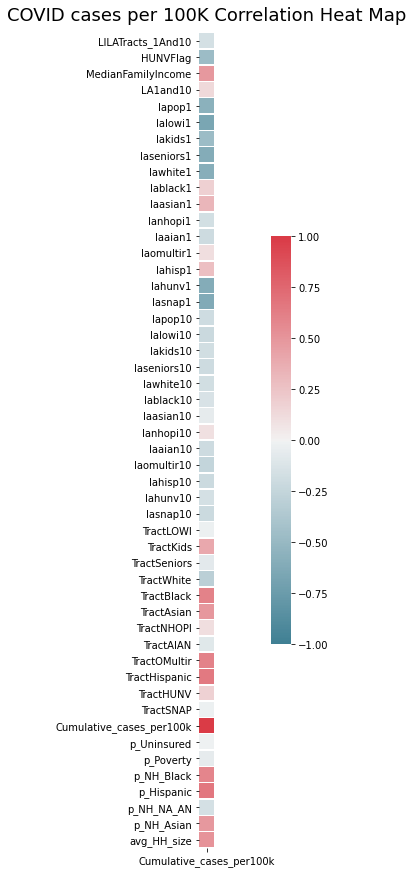

In [ ]:

#mask the upper half for visualization purposes
#filteredDf = cumulative_cases_df [((cumulative_cases_df  >= .5) | (cumulative_cases_df  <= -.5)) & (cumulative_cases_df  !=1.000)]
mask = np.zeros_like(cumulative_cases_df , dtype=np.bool)
mask[np.triu_indices_from(mask)] = False


# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
map = sns.heatmap(cumulative_cases_df,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

map.set_title('COVID cases per 100K Correlation Heat Map', fontdict={'fontsize':18}, pad=12);

In [ ]:
focus(NYcorr, Cumulative_cases_per100k )

NameError: ignored

In [ ]:
plt.figure(figsize=(16, 6))
df_correlations = sns.heatmap(NYcorr["Cumulative_cases_per100k"], vmin=-1, vmax=1, annot=True, cmap='BrBG')
df_correlations.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);